In [6]:
import sys, os, glob
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from scipy.interpolate import UnivariateSpline, interp1d
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from statsmodels.stats.libqsturng import psturng
import scipy.stats as stats

# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)

%matplotlib inline
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# Make a folder if it is not already there to store exported figures
!mkdir ../jupyter_figures

# Make a folder to store cleaned up data frames for more advanced statistical analysis in R.
# This is only necessary because exact p values were required by the journal, whereas the
# psturng in statsmodels.stats.libqsturng was bound by 0.001 and 0.9.
# Practically, nobody really cares about exact p values when p < 0.001 and p > 0.9, but got to get it when asked.
!mkdir ../data_cleaned


mkdir: ../jupyter_figures: File exists
mkdir: ../data_cleaned: File exists


In [2]:
df = pd.read_csv('../data/20200922-swelling-assay/20200922-swelling-assay-001-1_MG-area.txt')
df = pd.read_csv('../data/20200922-swelling-assay/20200922-swelling-assay-001-6_LMN-area.txt')
df

,frame_number,area
0,1,241516.228
1,2,242165.108
2,3,242653.313
3,4,242718.201
4,5,1240706.460
...,...,...
175,176,278880.901
176,177,278744.946
177,178,278659.973
178,179,279072.475


(0.8, 0.9)

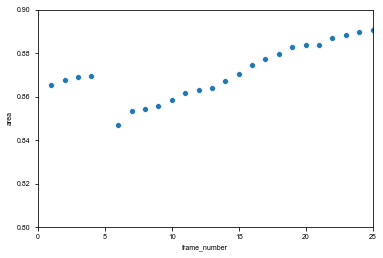

In [59]:
# df = pd.read_csv('../data/20200922-swelling-assay/20200922-swelling-assay-001-2_MG-area.txt')
# df = pd.read_csv('../data/20200922-swelling-assay/20200922-swelling-assay-001-1_MG-area.txt')
df = pd.read_csv('../data/20200922-swelling-assay/20200922-swelling-assay-001-6_LMN-area.txt')
ax = sns.scatterplot(df.frame_number, (df.area/df.area[len(df)-1]))
ax.set_xlim([0,25])
ax.set_ylim([0.8,0.9])


(0.8, 0.9)

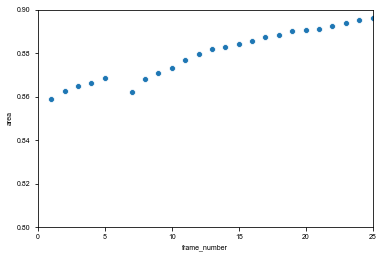

In [50]:
df = pd.read_csv('../data/20200922-swelling-assay/20200922-swelling-assay-001-3_MG-area.txt')
ax = sns.scatterplot(df.frame_number, (df.area/df.area[len(df)-1]))
ax.set_xlim([0,25])
ax.set_ylim([0.8,0.9])


(0.8, 0.9)

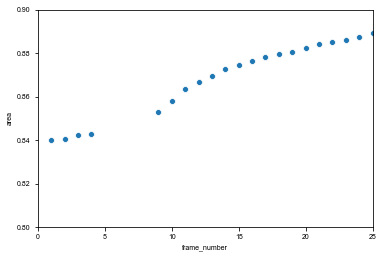

In [49]:
df = pd.read_csv('../data/20200922-swelling-assay/20200922-swelling-assay-002-1_MG-area.txt')

ax = sns.scatterplot(df.frame_number, (df.area/df.area[len(df)-1]))
ax.set_xlim([0,25])
ax.set_ylim([0.8,0.9])


(0.8, 0.9)

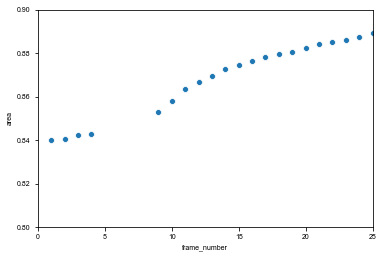

In [48]:
df = pd.read_csv('../data/20200922-swelling-assay/20200922-swelling-assay-002-1_MG-area.txt')
ax = sns.scatterplot(df.frame_number, (df.area/df.area[len(df)-1]))
ax.set_xlim([0,25])
ax.set_ylim([0.8,0.9])


(0.8, 0.9)

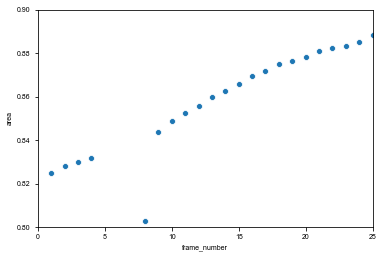

In [47]:
df = pd.read_csv('../data/20200922-swelling-assay/20200922-swelling-assay-002-2_MG-area.txt')
ax = sns.scatterplot(df.frame_number, (df.area/df.area[len(df)-1]))
ax.set_xlim([0,25])
ax.set_ylim([0.8,0.9])


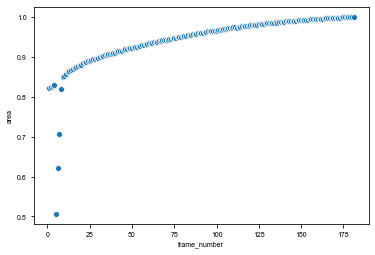

In [61]:
df = pd.read_csv('../data/20200922-swelling-assay/20200922-swelling-assay-002-3_MG-area.txt')
ax = sns.scatterplot(df.frame_number, (df.area/df.area[len(df)-1]))
# ax.set_xlim([0,25])
# ax.set_ylim([0.8,0.9])


(0.8, 0.9)

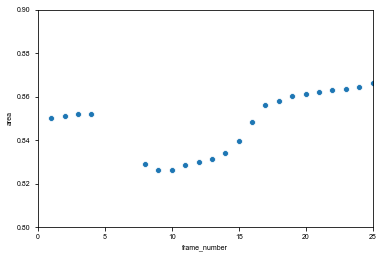

In [53]:
df = pd.read_csv('../data/20200922-swelling-assay/20200922-swelling-assay-002-6_LMN-area.txt')
ax = sns.scatterplot(df.frame_number, (df.area/df.area[len(df)-1]))
ax.set_xlim([0,25])
ax.set_ylim([0.8,0.9])


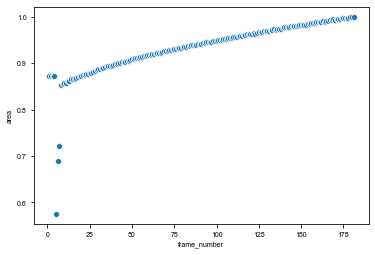

In [60]:
df = pd.read_csv('../data/20200922-swelling-assay/20200922-swelling-assay-002-5_LMN-area.txt')
ax = sns.scatterplot(df.frame_number, (df.area/df.area[len(df)-1]))
# ax.set_xlim([0,25])
# ax.set_ylim([0.8,0.9])


(0.8, 0.9)

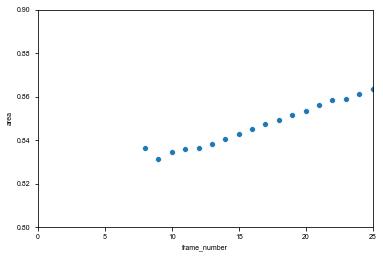

In [55]:
df = pd.read_csv('../data/20200922-swelling-assay/20200922-swelling-assay-002-4_LMN-area.txt')
ax = sns.scatterplot(df.frame_number, (df.area/df.area[len(df)-1]))
ax.set_xlim([0,25])
ax.set_ylim([0.8,0.9])


(0.8, 0.9)

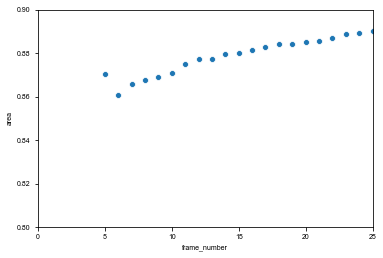

In [56]:
df = pd.read_csv('../data/20200922-swelling-assay/20200922-swelling-assay-001-5_LMN-area.txt')
ax = sns.scatterplot(df.frame_number, (df.area/df.area[len(df)-1]))
ax.set_xlim([0,25])
ax.set_ylim([0.8,0.9])


(0.8, 0.9)

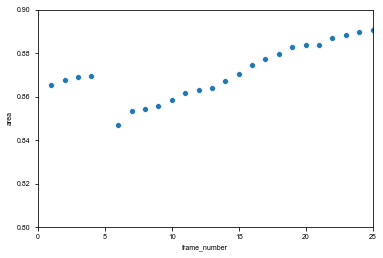

In [57]:
df = pd.read_csv('../data/20200922-swelling-assay/20200922-swelling-assay-001-6_LMN-area.txt')
ax = sns.scatterplot(df.frame_number, (df.area/df.area[len(df)-1]))
ax.set_xlim([0,25])
ax.set_ylim([0.8,0.9])


(0.8, 1.0)

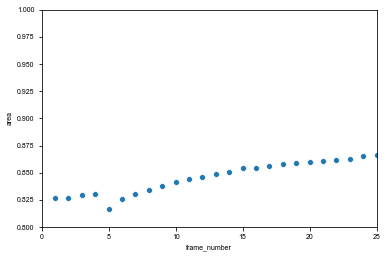

In [46]:
df = pd.read_csv('../data/20200922-swelling-assay/20200922-swelling-assay-003-1_2MG-1LMN-area.txt')
ax = sns.scatterplot(df.frame_number, (df.area/df.area[len(df)-1]))
ax.set_xlim([0,25])
ax.set_ylim([0.8,1])


(0.0, 0.36)

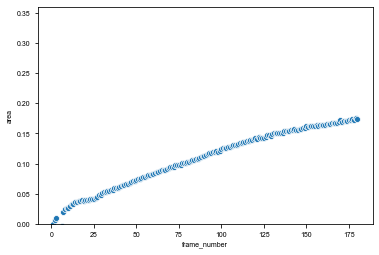

In [64]:
df = pd.read_csv('../data/20200922-swelling-assay/20200922-swelling-assay-003-3_2MG-1LMN-area.txt')
ax = sns.scatterplot(df.frame_number, (df.area-df.area[0])/df.area[0])
# ax = sns.scatterplot(df.frame_number, df5.area)
# ax.set_xlim([0,50])
ax.set_ylim([0,0.36])

(0.0, 0.36)

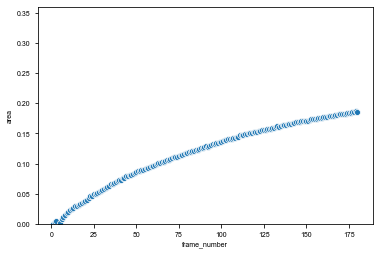

In [65]:
df = pd.read_csv('../data/20200922-swelling-assay/20200922-swelling-assay-003-4_1MG-2LMN-area.txt')
ax = sns.scatterplot(df.frame_number, (df.area-df.area[0])/df.area[0])
# ax = sns.scatterplot(df.frame_number, df5.area)
# ax.set_xlim([0,50])
ax.set_ylim([0,0.36])

(0.0, 0.36)

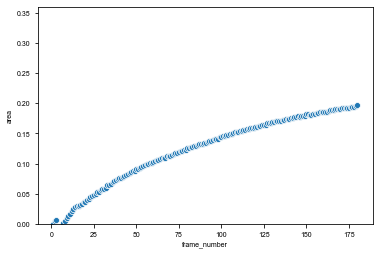

In [67]:
df = pd.read_csv('../data/20200922-swelling-assay/20200922-swelling-assay-003-6_1MG-2LMN-area.txt')
ax = sns.scatterplot(df.frame_number, (df.area-df.area[0])/df.area[0])
# ax = sns.scatterplot(df.frame_number, df5.area)
# ax.set_xlim([0,50])
ax.set_ylim([0,0.36])